#1. 파이토치의 nn.Linear와 nn.Sigmoid로 로지스틱 회귀 구현

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
model = nn.Sequential( # nn.Sequential()은 여러 함수들을 연결해주는 역할
    nn.Linear(2, 1), # input_dim = 2, output_dim = 1
    nn.Sigmoid() # 출력은 시그모이드 함수를 거침
)

In [ ]:
model(x_train) # 현재 W와 b는 임의의 값을 가지므로 현재의 예측은 의미가 없음

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr = 1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hypothesis = model(x_train)

  # cost 계산
  cost = F.binary_cross_entropy(hypothesis, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 10번마다 로그 출력
  if epoch % 10 ==0:
    prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
    correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
    accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산

    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 긱 에포크마다 정확도를 출력
        epoch, nb_epochs, cost.item(), accuracy * 100,
    ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


#2. 인공 신경망으로 표현되는 로지스틱 회귀

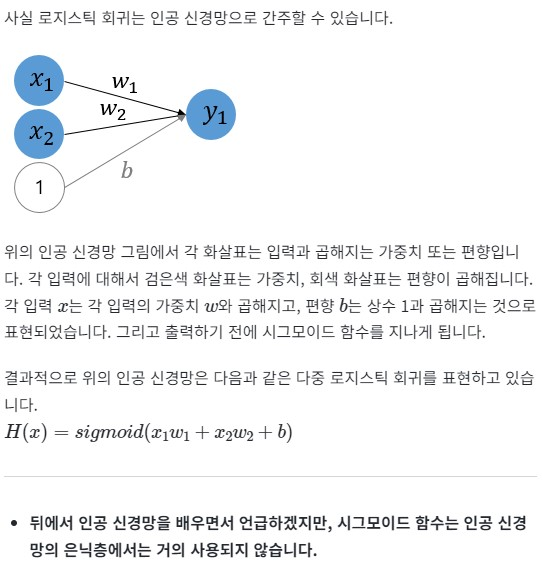